# 1.1 Análise Univariada

**Projeto:** Ligia Group Challenge 2026  
**Autor:** grupo 17  
**Fase CRISP-DM:** Data Understanding  
**Objetivo:** Analisar distribuição e características individuais de cada variável

## Importação de Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy import stats

sns.set_theme(style="whitegrid")
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

## Carregamento dos Dados

In [2]:
data_path = Path('../data/raw/Sleep_health_and_lifestyle_dataset.csv')
df = pd.read_csv(data_path, sep=';')

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Dataset: {df.shape[0]} linhas x {df.shape[1]} colunas")

Dataset: 374 linhas x 13 colunas


## Análise de Variáveis Categóricas

In [3]:
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print(f"\nProporção (%):")
    print(df[col].value_counts(normalize=True).mul(100).round(2))
    print("-" * 60)


Gender:
Gender
Male      189
Female    185
Name: count, dtype: int64

Proporção (%):
Gender
Male      50.53
Female    49.47
Name: proportion, dtype: float64
------------------------------------------------------------

Occupation:
Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

Proporção (%):
Occupation
Nurse                   19.52
Doctor                  18.98
Engineer                16.84
Lawyer                  12.57
Teacher                 10.70
Accountant               9.89
Salesperson              8.56
Scientist                1.07
Software Engineer        1.07
Sales Representative     0.53
Manager                  0.27
Name: proportion, dtype: float64
--------------------------------------------

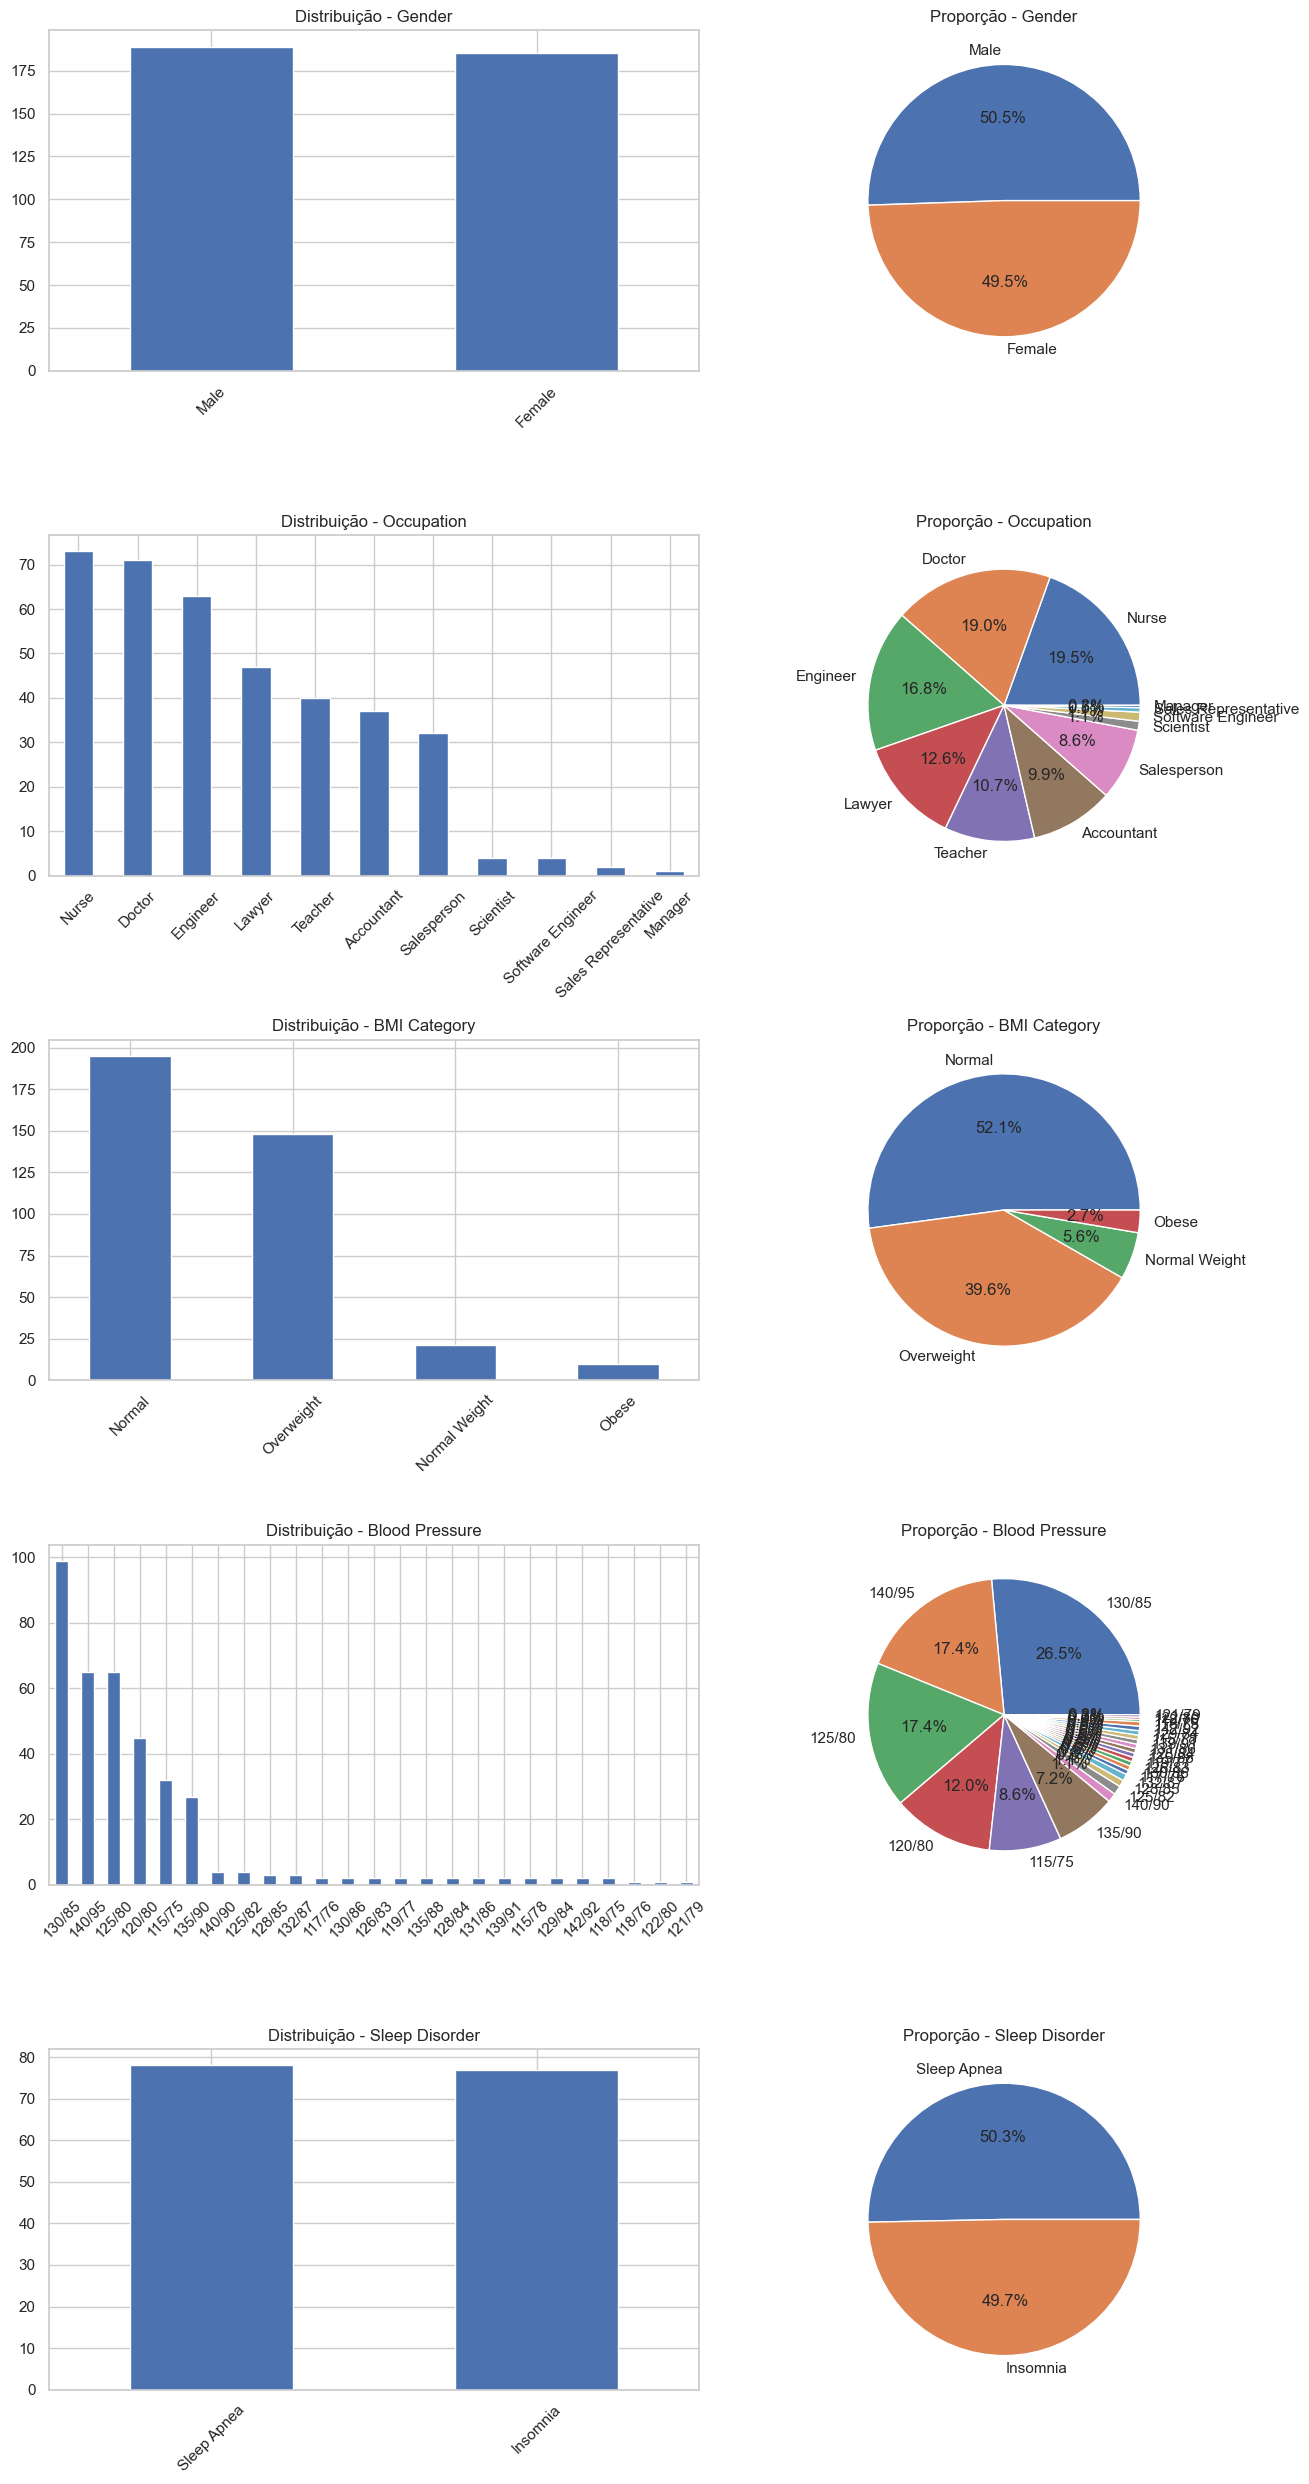

In [4]:
n_cat = len(categorical_cols)
fig, axes = plt.subplots(n_cat, 2, figsize=(14, 5*n_cat))

for i, col in enumerate(categorical_cols):
    df[col].value_counts().plot(kind='bar', ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribuição - {col}')
    axes[i, 0].set_xlabel('')
    axes[i, 0].tick_params(axis='x', rotation=45)
    
    df[col].value_counts().plot(kind='pie', ax=axes[i, 1], autopct='%1.1f%%')
    axes[i, 1].set_title(f'Proporção - {col}')
    axes[i, 1].set_ylabel('')

plt.tight_layout()
plt.show()